#Pothole Detection using Computer Vision (YOLO V5 model)

In [ ]:
import torch # YOLOv5 implemented using pytorch

## Clone the GitHub repo from Ultralytics to get all necessary files

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14992, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 14992 (delta 0), reused 1 (delta 0), pack-reused 14989
Receiving objects: 100% (14992/14992), 13.96 MiB | 18.16 MiB/s, done.
Resolving deltas: 100% (10299/10299), done.


In [ ]:
%cd yolov5

/content/yolov5


In [ ]:
torch.cuda.get_arch_list() 

['sm_37', 'sm_50', 'sm_60', 'sm_70', 'sm_75', 'sm_80', 'sm_86']

In [ ]:
print('All set. Using PyTorch version %s with %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))


All set. Using PyTorch version 1.13.0+cu116 with _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


## Installing Roboflow to get the Dataset in proper format required

In [ ]:
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 KB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 8.2 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=e7b663706bd4e54245b0dab187c18f2541a3edc0bbf4e03ea6087fea4838f837
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pypar

Once all the files are cloned, you’ll need to move the dataset’s dataset.yaml file to the yolov5/data directory. This file contains information required by YOLO to train the model on the custom data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Dataset to the colab environment

In [ ]:
%cd /content
from roboflow import Roboflow
rf = Roboflow(api_key="dMwwevKp5n1ERleo3og4")
project = rf.workspace("mayuresh-madiwale-m4ijr").project("potholes-s0qe5")
dataset = project.version(7).download("yolov5")

/content
loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to potholes-7 in yolov5pytorch:: 100%|██████████| 4856/4856 [00:04<00:00, 1024.69it/s]


## Training the yolov5 Model

In [ ]:
%cd yolov5
!python train.py --img 320 --batch 64 --epochs 300 --data dataset1.yaml --weights yolov5m.pt --cache --patience 50

/content/yolov5
train: weights=yolov5m.pt, cfg=, data=dataset1.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=64, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=50, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=

## Testing the Model on Google Colab
Let’s explore now how confident our model is. We can plot a validation batch obtained during training and inspect the confidence score of each label:

At the end of the training, two files should be saved in yolov5/runs/train/exp/weights: last.pt and best.pt. We’ll use best.pt.

If you want to explore the metrics recorded during training, it will be stored in runs/train/

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp13/weights/best.pt --img 320 --conf 0.5 --source /content/potholes-5/test/images --line-thickness 1 

detect: weights=['/content/yolov5/runs/train/exp13/weights/best.pt'], source=/content/potholes-5/test/images, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/148 /content/potholes-5/test/images/G0088802_JPG.rf.d0dbdb5c0e67ebc3b93ea3f480edd55d.jpg: 320x320 4 Potholes, 13.6ms
image 2/148 /content/potholes-5/test/images/G0088833_JPG.rf.d9f98227f8c48083b3288d7e8779ac92.jpg: 320x320 1 Pothole, 13.6ms
image 3/148 /content/potholes-5/test/images/G0089240_JPG.rf.5d7ca967

## Yolov5 model is trained and tested. 

## Now next step is to convert it into a tflite model, so that we can use it on android phone


### you have best.pt and last.pt inside runs/train/exp/weights

In [ ]:
#Convert weights to fp16 TFLite model

!python export.py --weights /content/drive/MyDrive/Road_potholes/yolov5/exp13/weights/best.pt --include tflite  --img 320

export: data=data/coco128.yaml, weights=['/content/drive/MyDrive/Road_potholes/yolov5/exp13/weights/best.pt'], imgsz=[320], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.8.16 torch-1.13.0+cu116 CPU

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs

PyTorch: starting from /content/drive/MyDrive/Road_potholes/yolov5/exp13/weights/best.pt with output shape (1, 6300, 6) (40.1 MB)

TensorFlow SavedModel: starting export with tensorflow 2.9.2...

                 from  n    params  module                                  arguments                     
2023-01-06 11:09:47.720183: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-ca

##After running the above command, you will have best-fp16.tflite in runs/train/exp/weights folder

## Lets run the created tflite model.

In [ ]:
!python detect.py --weights /content/drive/MyDrive/Road_potholes/yolov5/exp13/weights/best-fp16.tflite --img 320 --conf 0.5 --source /content/potholes-5/test/images

detect: weights=['/content/drive/MyDrive/Road_potholes/yolov5/exp13/weights/best-fp16.tflite'], source=/content/potholes-5/test/images, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Loading /content/drive/MyDrive/Road_potholes/yolov5/exp13/weights/best-fp16.tflite for TensorFlow Lite inference...
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
image 1/148 /content/potholes-5/test/images/G0088802_JPG.rf.d0dbdb5c0e67ebc3b93ea3f480edd55d.jpg: 320x320 4 persons, 318.8ms
image 2/148 /content/potholes-5/test/images/G0088833_JPG.rf.d9f98227f8c48083b3288d7e8

In [ ]:
!python detect.py --weights /content/drive/MyDrive/Road_potholes/yolov5/exp13/weights/best-fp16.tflite --img 320 --conf 0.5 --source /content/potholes-5/test/images --device cpu

detect: weights=['/content/drive/MyDrive/Road_potholes/yolov5/exp13/weights/best-fp16.tflite'], source=/content/potholes-5/test/images, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.8.16 torch-1.13.0+cu116 CPU

Loading /content/drive/MyDrive/Road_potholes/yolov5/exp13/weights/best-fp16.tflite for TensorFlow Lite inference...
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
image 1/148 /content/potholes-5/test/images/G0088802_JPG.rf.d0dbdb5c0e67ebc3b93ea3f480edd55d.jpg: 320x320 4 persons, 299.2ms
image 2/148 /content/potholes-5/test/images/G0088833_JPG.rf.d9f98227f8c48083b3288d7e8779ac92.jpg: 320x320 

## Our model is working fine and results are stored in runs/detect/exp

#Our model is trained, tested and converted to be used directly in android. Further coding for integration has to be done in java language inside Android Studio.

In [ ]:
%cd /content/yolov5
!python detect.py --weights /content/drive/MyDrive/Road_potholes/yolov5/best-fp16_new.tflite --img 320 --conf 0.5 --source /content/pothole_road.mp4 

/content/yolov5
detect: weights=['/content/drive/MyDrive/Road_potholes/yolov5/best-fp16_new.tflite'], source=/content/pothole_road.mp4, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: YOLOv5 requirements "gitpython" "ipython" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.8 MB/s eta 0:00:00

requirements: 2 packages updated per /

In [ ]:
!python detect.py --weights /content/drive/MyDrive/Road_potholes/yolov5/best-fp16_new.tflite --img 320 --conf 0.5 --source /content/test/ --line-thickness 1

detect: weights=['/content/drive/MyDrive/Road_potholes/yolov5/best-fp16_new.tflite'], source=/content/test/, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-70-g589edc7 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Loading /content/drive/MyDrive/Road_potholes/yolov5/best-fp16_new.tflite for TensorFlow Lite inference...
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
image 1/3 /content/test/download (1).jpg: 320x320 5 persons, 118.9ms
image 2/3 /content/test/download (2).jpg: 320x320 1 person, 109.3ms
image 3/3 /content/test/images.jpg: 320x320 (no detections), 102.1ms
Speed: 692.8ms pre-process, 110.1ms infer

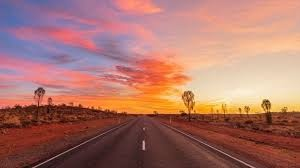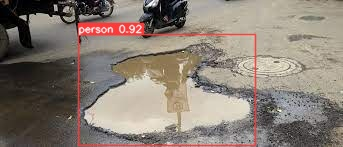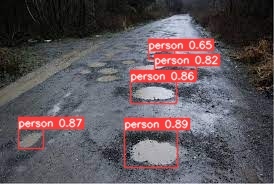

# Output can be seen in above images. tflite by default use the default names for class names. This does not effect the prediction we can change the label names while coding for the Android App